## Dataset Visualisation and Analysis using Pandas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

#### 1. Analysing Various frames

In [3]:
ratings.info()
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


In [5]:
movie_ratings.info()
movie_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
user_id               100000 non-null int64
rating                100000 non-null int64
unix_timestamp        100000 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


,movie_id,video_release_date,user_id,rating,unix_timestamp
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08
std,330.798356,NaN,266.61442,1.125674,5.343856e+06
min,1.000000,NaN,1.00000,1.000000,8.747247e+08
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08


In [9]:
lens.info()
lens.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
user_id               100000 non-null int64
rating                100000 non-null int64
unix_timestamp        100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_code              100000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


In [11]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [12]:
lens.tail()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567
99999,901,Mr. Magoo (1997),25-Dec-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286491,19,M,student,56567


#### 2. Visualising Dataset

Text(0.5,0,'age')

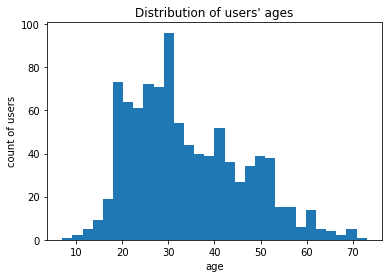

In [13]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

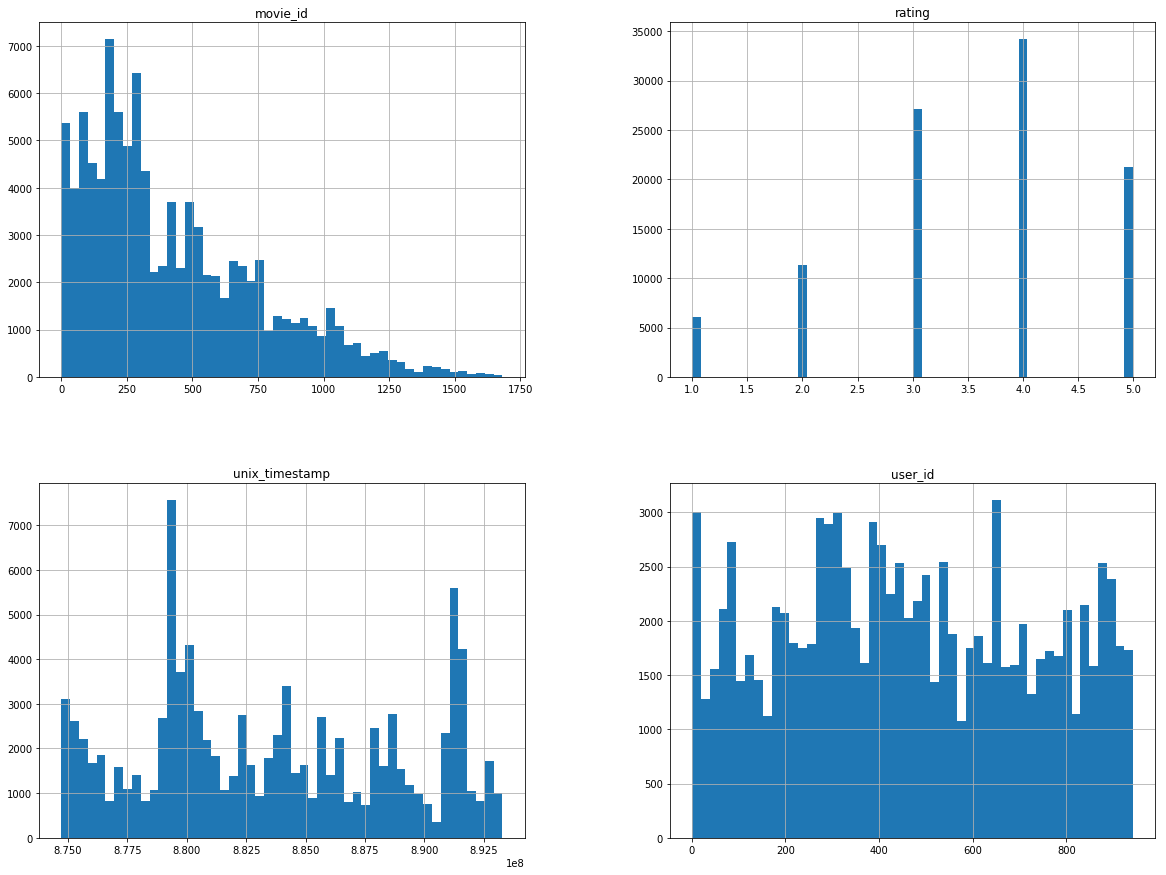

In [14]:
%matplotlib inline
ratings.hist(bins=50, figsize=(20,15))
plt.show()

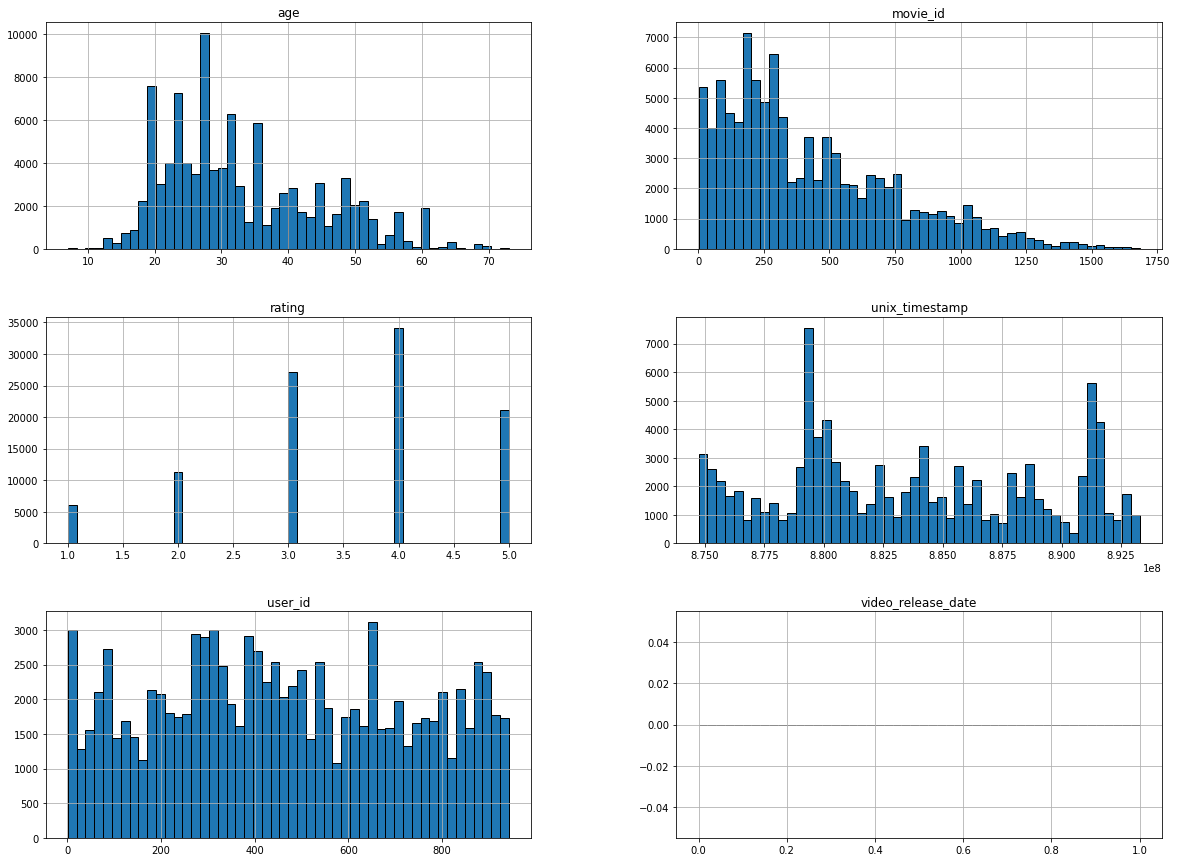

In [15]:
%matplotlib inline
lens.hist(bins=50, figsize=(20,15),edgecolor=(0,0,0),linewidth=1)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BBF2533C8>,
      dtype=object)

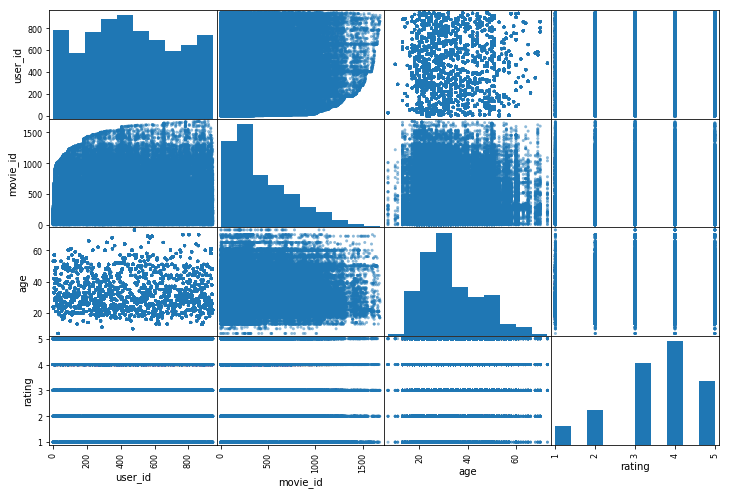

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["user_id","movie_id","age","zip_code","rating"]
scatter_matrix(lens[attributes],figsize=(12,8))

## Building Models

### Euclidean Correlation Score

In [17]:
from IPython.display import HTML
HTML('<img src="./euclid.gif">')

In [30]:
from math import sqrt
#Returns a distance-based similarity score for person1 and  person2
def sim_distance(prefs,person1,person2):
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
    if len(si)==0: 
        return 0
    #Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)

### Pearson Correlation Score
(Helps by correcting and taking into consideration the grade inflation)

In [31]:
from IPython.display import HTML
HTML('<img src="./pear.gif">')

In [32]:
def sim_pearson(prefs,p1,p2):
  # Get the list of mutually rated items
  si={}
    
  for item in prefs[p1]: 
    if item in prefs[p2]: si[item]=1

  # if they are no ratings in common, return 0
  if len(si)==0: return 0

  # Sum calculations
  n=len(si)

  # Sums of all the preferences
  sum1=sum([prefs[p1][it] for it in si])
  sum2=sum([prefs[p2][it] for it in si])

  # Sums of the squares
  sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
  sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	

  # Sum of the products
  pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])

  # Calculate r (Pearson score)
  num=pSum-(sum1*sum2/n)
  den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))

  if den==0: return 0
    
  r=num/den
  return r

# User-Based Collaborative Filtering

### Load-Dataset

In [33]:
def loadMovieLens(path='.\ml-100k'):
    #Get movie titles
    movies={}
    for line in open(path+'\\u.item'):
        (id,title) = line.split('|')[0:2]
        movies[id] = title
    #Load data
    prefs={}
    for line in open(path+'\\u.data'):
        (user,movieid,rating,ts) = line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

### Function To find people with the most similar taste to you.

In [34]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.
def topMatches(prefs,person,n=5,similarity=sim_pearson):
  scores=[(similarity(prefs,person,other),other) 
                  for other in prefs if other!=person]
  scores.sort()
  scores.reverse()
  return scores[0:n]

### Function to get Final Recomendations, Based on weights assigned to each person.

In [35]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
  totals={}
  simSums={}
    
  for other in prefs:
    # don't compare me to myself
    sim=similarity(prefs,person,other)
    
    # ignore scores of zero or lower
    if sim<=0: continue
        
    for item in prefs[other]:
        
      # only score movies I haven't seen yet
      if item not in prefs[person] or prefs[person][item]==0:
            
        # Similarity * Score
        totals.setdefault(item,0)
        totals[item]+=prefs[other][item]*sim
        
        # Sum of similarities
        simSums.setdefault(item,0)
        simSums[item]+=sim
        
  # Create the normalized list
  rankings=[(total/simSums[item],item) for item,total in totals.items()]
    
  # Return the sorted list
  rankings.sort()
  rankings.reverse()
  return rankings

In [36]:
prefs = loadMovieLens()
getRecommendations(prefs,'87')[0:30]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Boys, Les (1997)'),
 (4.89884443128923, 'Legal Deceit (1997)'),
 (4.815019082242709, 'Letter From Death Row, A (1998)'),
 (4.7321082983941425, 'Hearts and Minds (1996)'),
 (4.696244466490867, 'Pather Panchali (1955)'),
 (4.652397061026758, 'Lamerica (1994)'),
 (4.538723693474813, 'Leading Man, The (1996)'),
 (4.535081339106105, 'Mrs. Dalloway (1997)'),
 (4.532337612572981, 'Innocents, The (1961)'),
 (4.527998574747076, 'Casablanca (1942)'),
 (4.510270149719864, 'Everest (1998)'),
 (4.493967755428438, 'Dangerous Beauty (1998)'),
 (4.485151301801341, 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (4.463287461290221, 'Wrong Trousers, The (1993)'),
 (4.450979436941

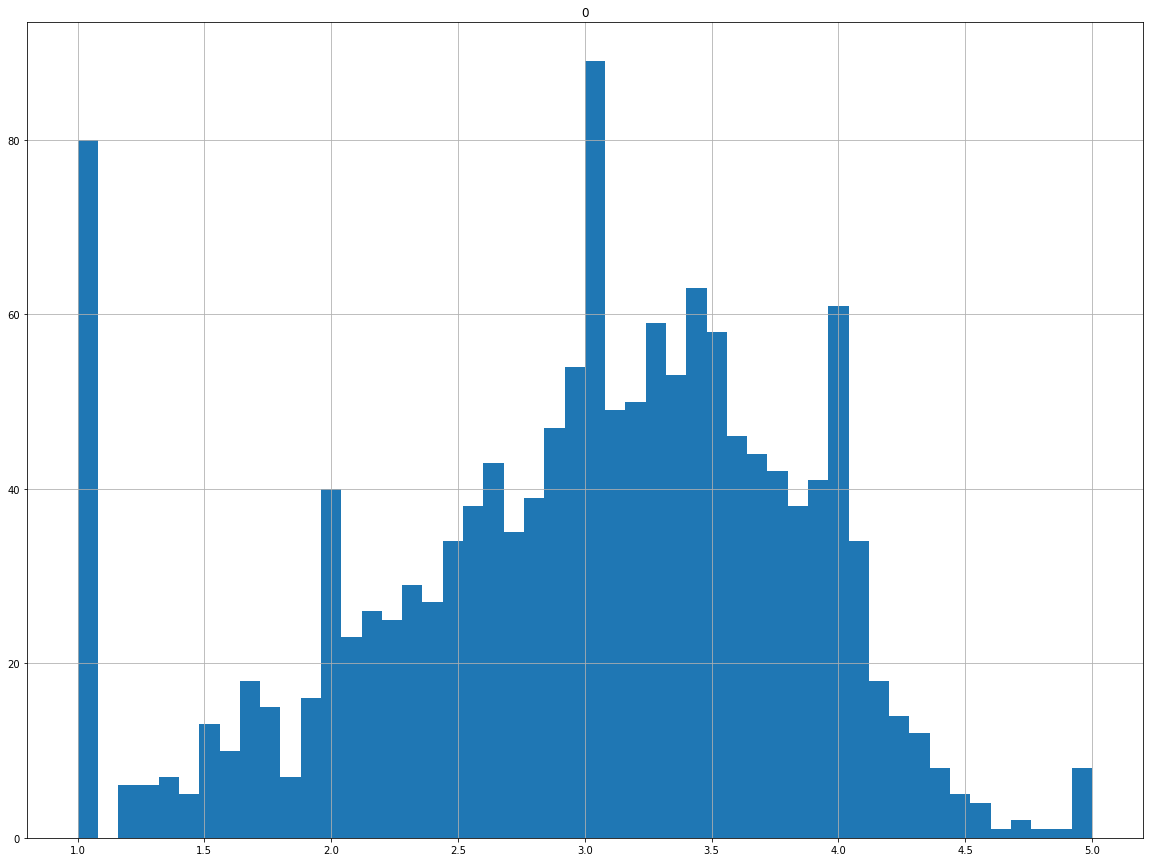

In [38]:
%matplotlib inline
df_ubcf = pd.DataFrame(getRecommendations(prefs,'87'))
df_ubcf.hist(bins=50, figsize=(20,15))
plt.show()

# Item-Based Collaborative Filtering

In [39]:
def transformPrefs(prefs):
    result={}
    #Iterate over the dict()
    for each_person in prefs:
        for each_item in prefs[each_person]:
            
            #create a key in the new dict using setdefault() method
            result.setdefault(each_item,{})
            
            #Flip the dict()
            result[each_item][each_person] = prefs[each_person][each_item]
    return result

### Function to find similar-items with an similarity-metric of ones choosing

In [41]:
def calculateSimilarItems(prefs,n=10):
    #Create a dictionary of items with other similar items as values.
    results={}
    
    #Invert the preference matrix to be item-centric
    itemPrefs = transformPrefs(prefs)
    
    c=0
    for item in itemPrefs:
        #Status Updates For Large datasets
        if c%100:
            print("%d / %d" % (c,len(itemPrefs)))
        #Find the most similar items to this one 
        scores = topMatches(itemPrefs,item,n=n,similarity=sim_distance)
        results[item] = scores
    return results

### Function to get Final Recommendations based on IBCF

In [42]:
def getRecommendedItems(prefs,itemMatch,user):
        userRatings=prefs[user]
        scores={}
        totalSim={}
        
        #Loop Over items rated by the user
        for (item,rating) in userRatings.items():
            
            #Loop Over items Similar to this one
            for (similarity,item2) in itemMatch[item]:
                
                #Ignore if the item is already rated by user
                if item2 in userRatings:continue
                    
                #Weighted Sum of rating times Similarity
                scores.setdefault(item2,0)
                scores[item2]+=similarity*rating
                
                #Sum of all Similarities
                totalSim.setdefault(item2,0)
                totalSim[item2]+=similarity
        #Divide each total score by total weighting to get an average.
        rankings = [(score/totalSim[item],item) for item,score in scores.items()]
        
        #Return the rankings from highest to lowest
        
        rankings.sort()
        rankings.reverse()
        return rankings

In [43]:
itemsim = calculateSimilarItems(prefs,n=50)
getRecommendedItems(prefs,itemsim,'87')

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 

In [44]:
itemsim = calculateSimilarItems(prefs,n=50)
ranks = getRecommendedItems(prefs,itemsim,'87')
df_ibcf = pd.DataFrame(ranks)

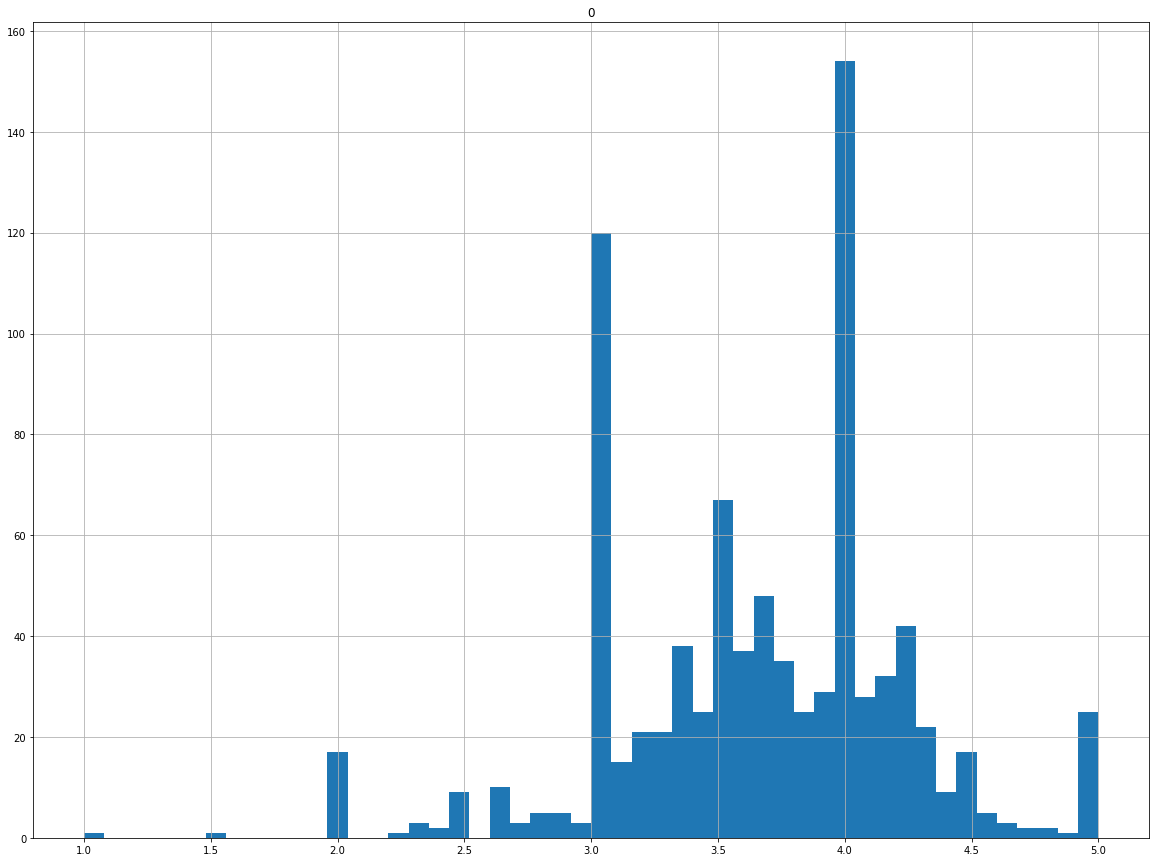

In [45]:
%matplotlib inline
df_ibcf.hist(bins=50, figsize=(20,15))
plt.show()